In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the datasets
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Find the independant (x) and dependant (y) variables
x_train_pre=train_data.iloc[:,1:]
y_train_pre=train_data.iloc[:,0]
x_test=test_data.iloc[:,1:]
y_test=test_data.iloc[:,0]

In [4]:
# Look at x and y's shapes
print("x Train Data Shape:", x_train_pre.shape)
print("y Train Data Shape:", y_train_pre.shape)
print("x Test Data Shape:", x_test.shape)
print("y Test Data Shape:", y_test.shape)

x Train Data Shape: (60000, 784)
y Train Data Shape: (60000,)
x Test Data Shape: (10000, 784)
y Test Data Shape: (10000,)


In [5]:
#Create training set and development set
x_train, x_dev, y_train, y_dev = train_test_split(x_train_pre, y_train_pre, train_size=0.8, random_state = 42)

print("Training Data Shapes:", x_train.shape, y_train.shape)
print("Development Data Shapes:", x_dev.shape, y_dev.shape)

Training Data Shapes: (48000, 784) (48000,)
Development Data Shapes: (12000, 784) (12000,)


### The purpose of the training, development and testing sets
The training set is the dataset that is used to train the model. The development set is used to see whether the model seems to be generalising well to data that is not in the training set. This makes it possible to spot and try to remedy underfitting or overfitting. Only at the end do we test the model on totally unseen data using the testing set. 

In [6]:
# Create a classification model using RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

print("Performance:", clf.score(x_dev, y_dev))

Performance: 0.96925


### Parameter to tune, and why this parameter
I decided to tune the max_depth parameter. This determines how many levels the tree can have. Having more or less levels can be one of the factors that decides whether the model is overfitting or underfitting the data. Tuning this perameter will help to improve the performance of the model.

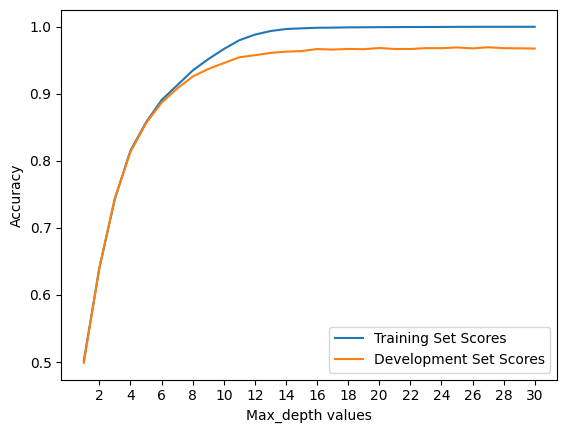

In [7]:
# max_depth tuning
depths = range(1,31)

training_depth_scores = []
dev_depth_scores = [] 
for i in depths:
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    training_depth_scores.append(train_score)
    dev_score = clf.score(x_dev, y_dev)
    dev_depth_scores.append(dev_score)

fig, ax = plt.subplots()
ax.plot(depths, training_depth_scores, label = "Training Set Scores")
ax.plot(depths, dev_depth_scores, label = "Development Set Scores")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
plt.legend()
plt.show()

In [8]:
print(f'Value of max_depth were the accuracy is at it\'s highest: {dev_depth_scores.index(max(dev_depth_scores)) + 1}')

Value of max_depth were the accuracy is at it's highest: 27


I will be using a max_depth value of 27 for my final model, as this is were the accuracy was at it's highest for the development set.

In [9]:
# Create a final classification model using a max depth of 27
clf = RandomForestClassifier(max_depth=27, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=27, random_state=42)

In [10]:
# make predictions on the test data
y_pred = clf.predict(x_test)

In [11]:
# Print the target values
print('Target values:')
print(y_train.value_counts().sort_index())

target_values = (0,1,2,3,4,5,6,7,8,9)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=target_values, index=target_values)
cm_df

Target values:
0    4748
1    5420
2    4784
3    4912
4    4666
5    4317
6    4741
7    4966
8    4691
9    4755
Name: label, dtype: int64


,0,1,2,3,4,5,6,7,8,9
0,970,0,0,0,0,2,3,1,3,1
1,0,1126,2,1,0,2,2,0,1,1
2,6,0,1001,5,4,0,4,8,4,0
3,1,0,15,965,0,7,0,10,8,4
4,1,0,1,0,957,0,4,1,3,15
5,4,1,0,7,1,859,5,3,7,5
6,6,3,1,0,4,4,936,0,4,0
7,1,4,18,1,0,0,0,988,3,13
8,5,0,3,7,5,7,5,3,930,9
9,5,5,2,12,11,2,1,4,7,960


Using the f1 score we can see which values the model finds the hardest to predict.

In [12]:
# f1 score per class
f = f1_score(y_test, y_pred, average=None)
    
sorted_f = np.argsort(f)

print('Hardest to easiest value to predict:')
for i in sorted_f:
    print(i)

Hardest to easiest value to predict:
9
8
3
2
7
5
4
6
0
1


It can be seen that the model finds the value 9 the hardest to predict and the value 1 the easiest.

In [13]:
# Accuracy
acc = clf.score(x_test, y_test)
print(f'Accuracy: {acc}')

# Each target values precision
print('\nThe precision for each target value:')
for i, j in enumerate(target_values):
    prec = precision_score(y_test == target_values.index(j), y_pred == target_values.index(j))
    print(f'{i}: {prec}')
    
# average precision
av_prec = precision_score(y_test, y_pred, average='macro')
print(f'\nAverage Precision: {av_prec}')

# Each target values precision
print('\nThe recall for each target value:')
for i, j in enumerate(target_values):
    rec = recall_score(y_test == target_values.index(j), y_pred == target_values.index(j))
    print(f'{i}: {rec}')

# average recall
av_rec = recall_score(y_test, y_pred, average='macro')
print(f'\nAverage Recall: {av_rec}')

# Each target values precision
print('\nThe f1 score for each target value:')
for i, j in enumerate(f):
    print(f'{i}: {j}')

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='macro')
print(f'\nAvearge f1 Score: {av_f1}')

Accuracy: 0.9692

The precision for each target value:
0: 0.970970970970971
1: 0.9885864793678666
2: 0.959731543624161
3: 0.966933867735471
4: 0.9745417515274949
5: 0.9728199320498301
6: 0.975
7: 0.9705304518664047
8: 0.9587628865979382
9: 0.9523809523809523

Average Precision: 0.9690258836121091

The recall for each target value:
0: 0.9897959183673469
1: 0.9920704845814978
2: 0.9699612403100775
3: 0.9554455445544554
4: 0.9745417515274949
5: 0.9630044843049327
6: 0.9770354906054279
7: 0.9610894941634242
8: 0.9548254620123203
9: 0.9514370664023786

Average Recall: 0.9689206936829355

The f1 score for each target value:
0: 0.9802930773117736
1: 0.990325417766051
2: 0.9648192771084336
3: 0.9611553784860557
4: 0.9745417515274949
5: 0.967887323943662
6: 0.9760166840458812
7: 0.9657869012707723
8: 0.9567901234567902
9: 0.9519087754090232

Avearge f1 Score: 0.9689524710325937
